# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, chi2
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

/home/jonathan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00402908, 0.        , 0.00402908, 0.        , 0.00402908,
        0.02417446, 0.02820353, 0.04431984, 0.04834892, 0.10475599,
        0.05237799, 0.14907583, 0.16519213, 0.23368643, 0.25383181,
        0.38679134, 0.52377993, 0.64465223, 0.75746637, 0.87028051,
        0.95892019, 1.05561802, 1.40211859, 1.49881643, 1.47867104,
        1.67609579, 1.82517161, 1.89366591, 2.00245098, 2.17570126,
        2.05482897, 2.0669162 , 1.81308439, 1.84934607, 1.59954334,
        1.56328165, 1.48270012, 1.33362429, 1.08382155, 0.9226585 ,
        0.82596066, 0.7010593 , 0.60436146, 0.49960548, 0.41902395,
        0.29412258, 0.21354105, 0.18130844, 0.14504675, 0.11281414,
        0.0684943 , 0.08058153, 0.02820353, 0.03626169, 0.01611631,
        0.00805815, 0.01208723, 0.00402908, 0.        , 0.        ,
        0.00521454]),
 array([0.25197987, 0.27679946, 0.30161904, 0.32643862, 0.35125821,
        0.37607779, 0.40089738, 0.42571696, 0.45053654, 0.47535613,
        0.50017571, 0.5249

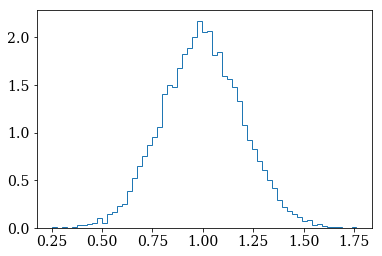

In [7]:
# create the normal distribution and set it up so I can use it with rvs
N=10000
mu=1.0
sigma=0.2
dist = norm(mu, sigma)
x = dist.rvs(N)

# find sigmaG
q25,q75 = np.percentile(x,[25,75]) 
sigmaG = 0.7413*(q75-q25) 

# find the bin size
binsize = 2.7*sigmaG/(N**(1./3.))
bins = np.append(np.arange(start=x.min(),stop=x.max(),step=binsize),x.max())

# make the histogram
plt.hist(x,bins=bins,histtype="step",normed=True) 

/home/jonathan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


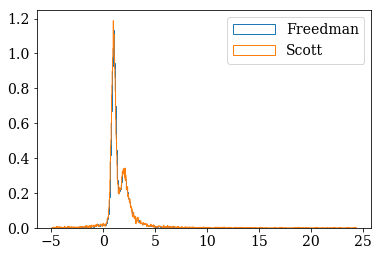

In [9]:
# First I create a Cauchy distribution (N=10000, mu=2.0 , gamma=0.5)
np.random.seed(0)
N = 10000
mu = 2.0
gamma = 0.5
dist = cauchy(mu, gamma)

# Then I concatenate the Gaussian and Cauchy distributions
x2 = np.concatenate([x,dist.rvs(N)])
np.random.shuffle(x2)
x2 = x2[x2 > -5]
x2 = x2[x2 < 25]

# Third I use Freedman-Diaconis again
q25,q75 = np.percentile(x2,[25,75])
sigmaG = 0.7413*(q75-q25)

binsize = 2.7*sigmaG/(N**(1./3.))
bins = np.append(np.arange(start=x2.min(),stop=x2.max(),step=binsize),x2.max())

plt.hist(x2,bins=bins,histtype="step",normed=True,label="Freedman") 

# Fourth I use Scott's rule
binsize = 3.5*sigma/(N**(1./3.))
bins = np.append(np.arange(start=x2.min(),stop=x2.max(),step=binsize),x2.max())

plt.hist(x2,bins=bins,histtype="step",normed=True,label="Scott")

plt.legend(loc='best')
plt.show()

/home/jonathan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

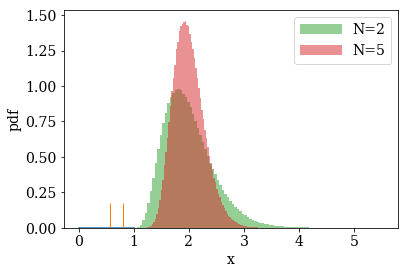

In [35]:
N = 2 # Number of draws
mu = 0.5 # Location
sigma = 1./np.sqrt(12)/np.sqrt(N)  # Scale factor

u = np.linspace(0,1,1000) # Array to sample the space
dist = chi2(5,loc=1.0,scale=0.2,) # Complete
plt.plot(u,dist.pdf(u)) # Complete

x = np.random.random(N) # N random draws
plt.plot(x, 0*x, '|', markersize=50)
plt.xlabel('x')
plt.ylabel('pdf')

# Add a histogram that is the mean of 1,000,000 draws
yy = []
for i in np.arange(1000000):
    xx = chi2.rvs(5,size=N,loc=1.0,scale=0.2) 
    yy.append(xx.mean()) 

plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True,label='N=2')

N = 5
yy=[]
for i in np.arange(1000000):
    xx = chi2.rvs(5, size=N,loc=1.0,scale=0.2)
    yy.append(xx.mean()) # Append average of those random draws to the end of the array

plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True,label='N=5')

# dist1 = 1./
# dist2 = 

# plt.plot(u, dist2.pdf(u), c='black',label='N = 5', ls='-.')
# plt.plot(u, dist1.pdf(u), c='black', label='N = 2',ls='-')


plt.legend(loc='best')
plt.show